You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


In [124]:
import copy 
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [4]:
X = np.load("/content/drive/MyDrive/SMAI/titanic/X.npy") # image
y = np.load("/content/drive/MyDrive/SMAI/titanic/Y.npy") # label


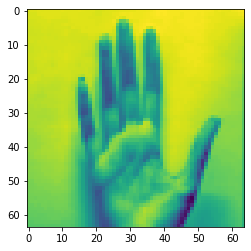

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X[-1])
plt.show()

In [6]:
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))
X.shape

(2062, 4096)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
a = np.argmax(y_train, axis=1)

(1443, 4096) (619, 4096) (1443, 10) (619, 10)


### Converting labels from one hot vector to a single value in range [0,9]

In [8]:
labels = np.ones((2062,1), dtype=int)
for i in range(2062):
  idx = np.argmax(y[i])
  labels[i]=idx
#print(labels.flatten().shape)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#print(X.shape, labels.shape)
data = np.append(X_train, y_train, axis=1)
print(data.shape)

(1443, 4096) (619, 4096) (1443, 1) (619, 1)
(1443, 4097)


### Stored 10 copies of the same dataset for 1 vs all classification

In [10]:
D0 = data.copy();D1 = data.copy();D2 = data.copy();D3 = data.copy();D4 = data.copy();D5 =data.copy();D6 = data.copy();D7 = data.copy();D8 = data.copy();D9 = data.copy()
print(D0.shape)

(1443, 4097)


### Assigned labels as 0 and 1 in each of these 10 datasets where 1 indicates the single digit class and 0 indicates rest 9 classes

In [ ]:
datasets = [D0,D1,D2,D3,D4,D5,D6,D7,D8,D9]
for i in range(10):
  for j in range(1443):
    if (np.argmax(y[j]) == i):
      datasets[i][j][4096] = 1
    else:
      datasets[i][j][4096] = 0

### 1 vs ALL Training

In [ ]:
m = 1443
itterations = 10000
cost_values = []
trained_parameters = []

for i in range(10):
  X = datasets[i]
  X = np.delete(X, 4096, 1)
  X=X/255
  y = datasets[i][:,-1].reshape((-1,1))
  
  alpha=0.01
  weights = np.random.rand(4096,1)
  bias = 0 
  costfunc_values = []
  k = 0
  print('Training for dataset ',i)
  for i in range(1,itterations+1):
    #logistic function
    z = np.dot(X,weights) + bias 
    #print("z=",z)
    #z = np.matmul(X,weights) + bias 
    hypothesis = 1/(1 + np.exp(-z)) 
    cost = 1/m*(-1*(np.sum(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))))
    costfunc_values.append(cost)
    k+=1

    dw =  1/m * np.dot(X.T, (hypothesis-y))
    db =  1/m * np.sum(hypothesis-y)
    weights = weights - alpha*dw
    bias = bias - alpha*db

    #stop training
    if i%400 == 0:
      print('running @ ',cost)
    #if i%2 == 0:
    #  if abs(cost-costfunc_values[-2])<0.000001:
    #   if abs(cost-costfunc_values[-3])<0.000001:
    #      break 
  cost_values.append(costfunc_values)  
  trained_parameters.append([weights,bias])      
  print('itteration number:',k)

Training for dataset  0
running @  1.9534808492914657
running @  0.6680711942081122
running @  0.4637265709436468
running @  0.42560438410059953
running @  0.4158214159399695
running @  0.4128546309446501
running @  0.41187178143809194
running @  0.4115294871442431
running @  0.41140651086957164
running @  0.41136123836382177
running @  0.411344060392183
running @  0.4113371647260777
running @  0.4113340600971581
running @  0.4113323594966541
running @  0.4113311803382798
running @  0.41133019519940756
running @  0.41132928236537636
running @  0.41132839653440306
running @  0.41132752083256924
running @  0.41132664897181076
running @  0.4113257786082179
running @  0.4113249088679298
running @  0.4113240394251117
running @  0.41132317015825576
running @  0.4113223010220413
itteration number: 10000
Training for dataset  1
running @  1.8801389288859587
running @  0.6557570940494585
running @  0.4638432876998101
running @  0.4276707188101639
running @  0.4183485387687912
running @  0.41552

### Stored all parameters(weights and bias) obtained after classification

In [ ]:
print(len(trained_parameters))
print(len(trained_parameters[0]),(trained_parameters[0][0].shape),(trained_parameters[0][1]))
tmp = np.array(trained_parameters)
print(tmp.shape)
W = []
B = []
for row in trained_parameters:
  W.append(row[0].flatten())
  B.append(row[1])
W = np.array(W)
B = np.array(B)
print(W.shape, B.shape)

### Prediction and testing

In [ ]:
yes=0
no=0
i = 0
confusion_matrix = np.zeros((10,10))
for row in X_test:
  row = row/255
  #print((np.dot(row, W.T)),(np.dot(row, W.T)).shape )
  z = np.dot(row, W.T) + B 
  hypothesis = 1/(1 + np.exp(-z))
  #print(hypothesis)
  confusion_matrix[y_test[i][0]][np.argmax(hypothesis)] += 1
  #print(np.argmax(hypothesis), y_test[i][0])
  if (np.argmax(hypothesis) == y_test[i][0]):
    yes +=1
  else:
    no +=1
  #break
  i +=1
print(yes,no, yes/(yes+no)*100)
print(confusion_matrix)

55 564 8.88529886914378
[[ 0.  3. 11. 16.  3. 14. 17.  0.  0.  0.]
 [ 0.  0.  1. 26.  2. 19. 13.  0.  0.  0.]
 [ 0.  1.  4. 23.  5. 27. 10.  0.  0.  0.]
 [ 0.  0.  1. 19.  0. 39. 11.  0.  0.  0.]
 [ 0.  7.  3. 12.  1. 26. 18.  0.  0.  0.]
 [ 0.  4.  8.  8.  2. 24. 11.  0.  0.  0.]
 [ 0.  1.  3.  9.  1. 22.  7.  0.  0.  0.]
 [ 0. 14.  1.  6.  3. 26. 15.  0.  0.  0.]
 [ 0.  0.  3. 11.  2. 34. 10.  0.  0.  0.]
 [ 2.  5.  4.  7.  2. 31. 11.  0.  0.  0.]]


# 1 VS 1 CLASSIFICATION

In [46]:
class logistic_regression():
  def __init__(self, iterations=10000, alpha=0.01, gamma=0.01, gd="plain", version="batch", batch_size=32):
    self.m = 0
    self.itterations = iterations
    self.cost_values = []
    self.trained_parameters = []
    self.weights = []
    self.bias = 0
    self.alpha = alpha
    self.update_dw = 0
    self.update_db = 0
    self.grad_type = gd
    self.gamma = gamma
    self.batch_size = batch_size
    self.version = version
    self.start = 0

  def plain_grad_desc(self, X, y, hypothesis, alpha):
    dw =  1/self.m * np.dot(X.T, (hypothesis-y))
    db =  1/self.m * np.sum(hypothesis-y)
    self.weights = self.weights - self.alpha*dw
    self.bias = self.bias - self.alpha*db

  def mini_batch_plain_grad_desc(self, X, y, hypothesis, alpha, start, batch_size):
    dw =  1/self.m * np.dot(X[start:batch_size].T, (hypothesis-y)[start:batch_size])
    db =  1/self.m * np.sum((hypothesis-y)[start:batch_size])
    self.weights = self.weights - self.alpha*dw
    self.bias = self.bias - self.alpha*db
    if (batch_size == 1):
      start = (start+1)%X.shape[0]
      return start
    start = start + batch_size
    if (start >= ((X.shape[0]//batch_size)*batch_size)):
      start = 0
    return start

  def momentum_based_grad_desc(self, X, y, hypothesis, alpha, gamma):
    dw =  1/self.m * np.dot(X.T, (hypothesis-y))
    db =  1/self.m * np.sum(hypothesis-y)
    self.update_dw = gamma*self.update_dw + self.alpha*dw
    self.update_db = gamma*self.update_db + self.alpha*db
    self.weights = self.weights - self.update_dw
    self.bias = self.bias - self.update_db

  def nesterov_grad_desc(self, X, y, hypothesis, alpha, gamma):
    dw =  1/self.m * np.dot(X.T, (hypothesis-y))
    db =  1/self.m * np.sum(hypothesis-y)
    
    weights_lookahead = self.weights - gamma*self.update_dw
    self.update_dw = gamma*self.update_dw + self.alpha*weights_lookahead
    self.weights = self.weights - self.update_dw

    bias_lookahead = self.bias - gamma*self.update_db
    self.update_db = gamma*self.update_db + self.alpha*bias_lookahead
    self.bias = self.bias - self.update_db

  def fit(self, X, y):
    X = X/255
    #self.y = datasets[i][:,-1].reshape((2062,1))
    self.m = X.shape[0]
    self.weights = np.random.rand(X.shape[1],1)
    costfunc_values = []
    k = 0
    for i in range(1,self.itterations+1):
      #logistic function
      z = np.dot(X, self.weights) + self.bias 
      #z = np.matmul(X,weights) + bias 
      hypothesis = 1/(1 + np.exp(-z)) 
      #cost function
      cost = 1/self.m*(-1*(np.sum(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))))
      costfunc_values.append(cost)
      #print(i,cost)
      k+=1

      #gradient decent
      if (self.grad_type=="plain" and self.version=="batch" ):
        self.plain_grad_desc(X, y, hypothesis, self.alpha)
      elif (self.grad_type=="momentum_based" and self.version=="batch" ):
        self.momentum_based_grad_desc(X, y, hypothesis, self.alpha, self.gamma)
      elif (self.grad_type=="nesterov" and self.version=="batch" ):
        self.nesterov_grad_desc(X, y, hypothesis, self.alpha, self.gamma)
      elif (self.grad_type=="plain" and self.version=="mini-batch" ):
        self.start = self.mini_batch_plain_grad_desc(X, y, hypothesis, self.alpha, self.start, self.batch_size)
      elif (self.grad_type=="plain" and self.version=="stochastic" ):
        self.start = self.mini_batch_plain_grad_desc(X, y, hypothesis, self.alpha, self.start, 1)
      #dw =  1/self.m * np.dot(X.T, (hypothesis-y))
      #db =  1/self.m * np.sum(hypothesis-y)
      #self.weights = self.weights - self.alpha*dw
      #self.bias = self.bias - self.alpha*db
      #print('running @ ',i,cost)
      #stop training
      if i%100 == 0:
        print('running @ ',cost)
      #print(len(costfunc_values))
      if i%3 == 0:
        if abs(cost-costfunc_values[-2])<0.000001:
          if abs(cost-costfunc_values[-3])<0.000001:
            break 
    self.cost_values.append(costfunc_values)  
    self.trained_parameters.append([self.weights,self.bias])      
    print('itteration number:',k)

  def predict(self, X, y):
    
    X=X/255

    self.weights = self.trained_parameters[0][0]
    self.bias = self.trained_parameters[0][1]
    correct_predictions = 0 
    for i in range(X.shape[0]):
      
      z = np.dot(X[i],self.weights) + self.bias 
      
      hypothesis = 1/(1 + np.exp(-z))
     
      if (hypothesis[0] >= 0.5 and y[i] == 1):
          correct_predictions+=1
      elif (hypothesis[0] < 0.5 and y[i] == 0):
          correct_predictions+=1    
        
    acc = (correct_predictions/X.shape[0])*100
    print('accuracy for dataset ',acc)
  
  def get_param(self):
    return self.weights.flatten(), self.bias

In [ ]:
clf = logistic_regression(iterations=1000, gd="plain")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1443, 4096) (619, 4096) (1443, 10) (619, 10)


In [14]:
labels = np.ones((2062,1), dtype=int)
for i in range(2062):
  idx = np.argmax(y[i])
  labels[i]=idx
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1443, 4096) (619, 4096) (1443, 1) (619, 1)


In [15]:
data = np.append(X_train, y_train, axis=1)
print(data.shape)

(1443, 4097)


### Sorted dataset on basis on actual value of digit(CLASS LABEL) for my ease

In [18]:
sorted_array = data[np.argsort(data[:, -1])]


### Stored data of each class separately

In [ ]:
D0 = sorted_array[:140].copy()
D1 = sorted_array[140:284].copy()
D2 = sorted_array[284:420].copy()
D3 = sorted_array[420:557].copy()
D4 = sorted_array[557:696].copy()
D5 = sorted_array[696:847].copy()
D6 = sorted_array[847:1011].copy()
D7 = sorted_array[1011:1152].copy()
D8 = sorted_array[1152:1298].copy()
D9 = sorted_array[1298:1443].copy()

In [29]:
DATA = [D0, D1, D2, D3, D4, D5, D6, D7, D8, D9]

### Stored data for all pairs of classes in a list, total 45 pairs

In [31]:
datasets = []
for i in range(10):
  for j in range(i+1, 10):
    datasets.append(np.concatenate((DATA[i], DATA[j]), axis=0))


### 1 vs 1 training

In [47]:
W = []
B = []
k = 0
for i in range(10):
  for j in range(i+1, 10):
    print("Training for  : ",i, "VS", j)
    X = datasets[k]
    X = X/255
    X = np.delete(X, 4096, 1)
    y = datasets[k][:,-1].reshape((-1,1))
    k += 1
    clf = logistic_regression(iterations=1000, gd="plain")
    clf.fit(X ,y)  
    wt, b = clf.get_param()
    W.append(wt)
    B.append(b)
    print("----------------------")


Training for  :  0 VS 1
itteration number: 3
----------------------
Training for  :  0 VS 2
running @  0.502158635819155
running @  0.38860944556855465
running @  0.31498297292757665
running @  0.2649461333637032
running @  0.22945826139054348
running @  0.2033527875676312
running @  0.183551018535383
running @  0.16813982707642144
running @  0.15588351655855492
running @  0.1459559208419598
itteration number: 1000
----------------------
Training for  :  0 VS 3
running @  -0.08171049162177642
running @  -0.5856728496982049
running @  -0.9638794677139223
running @  -1.2788271306790377
running @  -1.5598851463414898
running @  -1.8218643306215647
running @  -2.0727364873362353
running @  -2.317001740942167
running @  -2.5572833203227407
running @  -2.7951425429708
itteration number: 1000
----------------------
Training for  :  0 VS 4
running @  -1.0970450654352528
running @  -2.366746359633809
running @  -3.454118224634076
running @  -4.476909000579425
running @  -5.476275817654312
runni

In [48]:
weights = np.array(W)
weights.shape

(45, 4096)

In [79]:
bias = np.array(B)
bias.shape

(45,)

In [51]:
print(X_test.shape, y_test.shape)

(619, 4096) (619, 1)


In [89]:

W0 = weights[[0,1,2,3,4,5,6,7,8]]
W1 = weights[[0,9,10,11,12,13,14,15,16]]
W2 = weights[[1,9,17,18,19,20,21,22,23]]
W3 = weights[[2,10,17,24,25,26,27,28,29]]
W4 = weights[[3,11,18,24,30,31,32,33,34]]
W5 = weights[[4,12,19,25,30,35,36,37,38]]
W6 = weights[[5,13,20,26,31,35,39,40,41]]
W7 = weights[[6,14,21,27,32,36,39,42,43]]
W8 = weights[[7,15,22,28,33,37,40,42,44]]
W9 = weights[[8,16,23,29,34,38,41,43,44]]
all_weights = [W0,W1,W2,W3,W4,W5,W6,W7,W8,W9]
all_weights = np.array(all_weights)
print(all_weights.shape)

(10, 9, 4096)


In [78]:
print(W0.shape, W1.shape, W2.shape, W3.shape, W4.shape, W5.shape, W6.shape, W7.shape, W8.shape, W9.shape)

(9, 4096) (9, 4096) (9, 4096) (9, 4096) (9, 4096) (9, 4096) (9, 4096) (9, 4096) (9, 4096) (9, 4096)


### Prediction & testing

In [ ]:
def predict_1_vs_1(X, idx, counts, W):
  hyp = np.matmul(X, W[idx].T)
  pred = 1/(1 + np.exp(-hyp))
  counts[idx] = np.argwhere(pred > 0.5).flatten().shape[0]
  return counts

confusion_matrix = np.zeros((10,10))
correct = 0
for i in range(619):
  counts = np.zeros(10)
  for j in range(10):
    counts = predict_1_vs_1(X_test[i], j, counts, all_weights)
  pred = np.argmax(counts)
  if (pred==y_test[i][0]):
    correct += 1
    #print(pred,y_test[i])
  confusion_matrix[y_test[i][0]][pred] += 1


In [112]:
print("Accuracy =",correct/619*100)
print("confusion_matrix\n",confusion_matrix)

Accuracy = 46.203554119547654
confusion_matrix
 [[32  2  3 10  1  2  5  6  3  0]
 [ 5 28  5  4  6  4  0  4  1  4]
 [ 6 11 25  7  8  1  8  1  0  3]
 [ 0  7  1 31 14  2  0  5  4  6]
 [ 1  8  0  5 22  9  8 10  2  2]
 [ 6  6  0  1  0 40  1  0  3  0]
 [ 0  2  5  1  0  8 20  0  0  7]
 [ 7  7  8  3  0  0  0 36  1  3]
 [ 0  5  5  8 10  3  6  7 16  0]
 [ 4  8  1  2  2  5  0  4  0 36]]


## Using Sklearn

In [122]:
y_test = y_test.flatten()
y_train = y_train.flatten()

(1443,)

In [ ]:
clf = LogisticRegression(multi_class='ovr')
clf.fit(X_train, y_train)

In [129]:
pred = clf.predict(X_test)

In [130]:
clf.score(X_test, y_test)

0.7253634894991923

[[50  1  0  1  0  4  2  2  0  4]
 [ 1 52  0  1  1  1  5  0  0  0]
 [ 0  2 38  3  4  4  7  0 10  2]
 [ 0  0  2 48  1  0  7  0 12  0]
 [ 0  0  2  0 58  2  0  0  5  0]
 [ 7  1  2  2  2 39  2  0  2  0]
 [ 2  2  8  4  0  6 19  0  2  0]
 [ 3  0  1  1  1  1  1 53  3  1]
 [ 1  0  6  8  5  0  1  0 39  0]
 [ 1  1  0  0  0  0  2  5  0 53]]


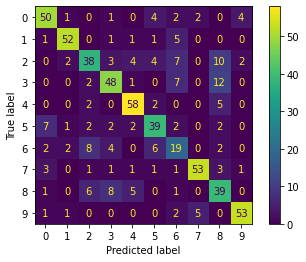

In [131]:
disp =metrics.plot_confusion_matrix(clf, X_test, y_test)
print(disp.confusion_matrix)